<a href="https://colab.research.google.com/github/MateusGheorghe/LAMP/blob/master/Step_3_Results_Analysis_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [69]:
AIRIS=1 # Using G-drive cloud AIRIS= 0 / Using AIRIS , AIRIS =1
GEN_SHEET=1 # Generate spreadsheet GEN_SHEET=1 / or not GEN_SHEET=0

In [70]:
if AIRIS==0:
  from google.colab import drive
  drive.mount("/gdrive")
  import os
  os.chdir("/gdrive/My Drive/MESTRADO/ProjetoRepsol/PZFLEXData/AIRIS")
  # os.chdir("/gdrive/My Drive/MESTRADO/ProjetoRepsol/COMSOLData")

In [71]:
# TensorFlow e tf.keras
import tensorflow as tf

In [72]:
# Librariesauxiliares
import itertools
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import pandas as pd
import time
sns.set()
import plotly.express as px
from sklearn import preprocessing
#Model Selection
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, cross_validate, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn import metrics
import pickle

In [73]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
import matplotlib.pyplot as plt
SMALL_SIZE = 22
MEDIUM_SIZE = 42
BIGGER_SIZE = 62
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [74]:
print('The tensorflow version is {}.'.format(tf.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The tensorflow version is 2.1.0.
The scikit-learn version is 0.22.1.


In [75]:
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print ('\nElapsed time is ')
        print (str(time.time() - startTime_for_tictoc))
        print('seconds.\n')
    else:
        print ('\nToc: start time not set\n')

In [76]:
def TIC():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc1
    startTime_for_tictoc1 = time.time()

def TOC():
    import time
    if 'startTime_for_tictoc' in globals():
        print ('\nElapsed time is ')
        print (str(time.time() - startTime_for_tictoc1))
        print('seconds.\n')
    else:
        print ('\nToc: start time not set\n')

In [77]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [78]:
!ls

Batches_plus_multi-defect	       PCs_446samples.mat
Batches_PZTs			       __pycache__
Datasets			       PZFlexData
DimensionalityReduction-Copy1.py       Relatorio_V1_Results
draw_neural_net.py		       repo
ExcelFileResults		       Results_Step2
Features_Manifold_Learning	       Severity_446samples.mat
Features_TSFEL			       Step2-12-may-2020
GridResult_500p_Classification.pickle  Step2-22-may-2020
GridResult_500p_Regression.pickle      Step2_image
Image_Approach			       teste-16-apr-2020
Old				       teste-26-apr-2020


# Loading Data

In [79]:
TIC()

In [80]:
# with open('Step2-22-may-2020/CLASSIFICATION-Dataset_r0_Batch1-Models_6_Kfold_10_Combinations_100_Repetitions_10_date_2020_05_27-14_35_20.pickle', 'rb') as filename:
#    TIME,Kf,Exec,Rep,DF,BestCases,BestScores,AllResults = pickle.load(filename)
# with open('Step2-22-may-2020/CLASSIFICATION-Dataset_r1_Batch1-Models_6_Kfold_10_Combinations_100_Repetitions_10_date_2020_05_30-09_29_01.pickle', 'rb') as filename:
#    TIME,Kf,Exec,Rep,DF,BestCases,BestScores,AllResults = pickle.load(filename)
# with open('Step2-22-may-2020/CLASSIFICATION-Dataset_r0_r1_Batch1-Models_6_Kfold_10_Combinations_100_Repetitions_10_date_2020_05_27-14_04_42.pickle', 'rb') as filename:
#    TIME,Kf,Exec,Rep,DF,BestCases,BestScores,AllResults = pickle.load(filename)
# with open('Step2-22-may-2020/CLASSIFICATION-Dataset_r1_Batch2and4-Models_6_Kfold_10_Combinations_100_Repetitions_10_date_2020_06_14-11_20_41.pickle', 'rb') as filename:
#    TIME,Kf,Exec,Rep,DF,BestCases,BestScores,AllResults = pickle.load(filename) # R1 - Batches 2 e 4
with open('Step2-22-may-2020/CLASSIFICATION-Dataset_r0_Batch2and4-Models_6_Kfold_10_Combinations_100_Repetitions_10_date_2020_06_07-16_40_37.pickle', 'rb') as filename:
   TIME,Kf,Exec,Rep,DF,BestCases,BestScores,AllResults = pickle.load(filename) # R0 - Batches 2 e 4
# with open('Step2-22-may-2020/CLASSIFICATION-J10-Dataset_r0_r1_Batch2and4-Models_6_Kfold_10_Combinations_100_Repetitions_10_date_2020_06_16-13_21_36.pickle', 'rb') as filename:
#    TIME,Kf,Exec,Rep,DF,BestCases,BestScores,AllResults = pickle.load(filename)
# with open('Step2-22-may-2020/CLASSIFICATION-J7-Dataset_r0_r1_Batch1-Models_6_Kfold_10_Combinations_100_Repetitions_10_date_2020_06_12-10_12_20.pickle', 'rb') as filename:
#    TIME,Kf,Exec,Rep,DF,BestCases,BestScores,AllResults = pickle.load(filename)
#Temp R0
# with open('Features_TSFEL/CLASSIFICATION-Dataset_Temp_r0_Batch_1-Models_6_Kfold_10_Combinations_100_Repetitions_10_date_2020_10_05-14_26_02.pickle', 'rb') as filename:
#    TIME,Kf,Exec,Rep,DF,BestCases,BestScores,AllResults = pickle.load(filename)
# #Temp R1
# with open('Features_TSFEL/CLASSIFICATION-Dataset_Temp_r0_Batch_1-Models_6_Kfold_10_Combinations_100_Repetitions_10_date_2020_10_05-14_26_02.pickle', 'rb') as filename:
#    TIME,Kf,Exec,Rep,DF,BestCases,BestScores,AllResults = pickle.load(filename)   
# #Stat R0
# with open('Features_TSFEL/CLASSIFICATION-Dataset_Temp_r0_Batch_1-Models_6_Kfold_10_Combinations_100_Repetitions_10_date_2020_10_05-14_26_02.pickle', 'rb') as filename:
#    TIME,Kf,Exec,Rep,DF,BestCases,BestScores,AllResults = pickle.load(filename)   
# #Stat R1
# with open('Features_TSFEL/CLASSIFICATION-Dataset_Temp_r0_Batch_1-Models_6_Kfold_10_Combinations_100_Repetitions_10_date_2020_10_05-14_26_02.pickle', 'rb') as filename:
#    TIME,Kf,Exec,Rep,DF,BestCases,BestScores,AllResults = pickle.load(filename)   


In [81]:
DF

,estimator,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_Accuracy,std_test_Accuracy,mean_test_AUC,std_test_AUC
0,SVM,0.193155,0.033080,0.003872,0.000611,"{'kernel': 'rbf', 'gamma': 0.1, 'degree': 3, '...",0.990341,0.008305,0.999045,0.001279
1,SVM,0.202741,0.035010,0.003843,0.000253,"{'kernel': 'rbf', 'gamma': 0.1, 'degree': 3, '...",0.990341,0.008305,0.999045,0.001279
2,SVM,0.852418,0.130363,0.003497,0.000327,"{'kernel': 'poly', 'gamma': 10.0, 'degree': 2,...",0.989003,0.009251,0.999382,0.000908
3,SVM,0.202607,0.028929,0.003157,0.000053,"{'kernel': 'poly', 'gamma': 1.0, 'degree': 4, ...",0.988852,0.007758,0.998437,0.002178
4,SVM,0.096149,0.006363,0.004340,0.000572,"{'kernel': 'rbf', 'gamma': 0.1, 'degree': 3, '...",0.988336,0.008993,0.999216,0.001233
...,...,...,...,...,...,...,...,...,...,...
595,SVM,0.326057,0.005564,0.010488,0.000365,"{'kernel': 'sigmoid', 'gamma': 1e-11, 'degree'...",0.199345,0.065298,0.100697,0.010501
596,SVM,0.322349,0.002719,0.010366,0.000202,"{'kernel': 'sigmoid', 'gamma': 1e-05, 'degree'...",0.199345,0.065298,0.115433,0.014323
597,SVM,0.320553,0.002669,0.010593,0.000183,"{'kernel': 'sigmoid', 'gamma': 1e-14, 'degree'...",0.199345,0.065298,0.100696,0.010503
598,SVM,0.156886,0.003533,0.006814,0.000185,"{'kernel': 'poly', 'gamma': 1e-07, 'degree': 3...",0.197255,0.057931,0.500000,0.000000


In [82]:
DF.groupby('estimator').size()

estimator
ABST    100
BAG     100
GBST    100
MLP     100
RF      100
SVM     100
dtype: int64

# Randomized CV Results

In [83]:
DF_sorted_by_esitmator=DF.sort_values(by=['estimator'])
Best_of_each_case = DF.groupby('estimator').first() 

In [84]:
Best_of_each_case

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_Accuracy,std_test_Accuracy,mean_test_AUC,std_test_AUC
estimator,,,,,,,,,
ABST,0.007261,0.000320,0.003561,0.000161,"{'n_estimators': 4, 'learning_rate': 0.1}",0.615760,0.047176,0.866892,0.012890
BAG,0.086859,0.000923,0.007842,0.000080,"{'n_estimators': 32, 'max_samples': 0.8, 'max_...",0.983654,0.009967,0.998052,0.002551
GBST,0.965862,0.006917,0.004481,0.000132,"{'subsample': 0.8, 'n_estimators': 256, 'min_s...",0.982911,0.010890,0.998826,0.001466
MLP,58.762246,4.443611,0.086055,0.007155,"{'t_activation': 'relu', 'n_neurons': 100, 'n_...",0.986551,0.009732,0.998850,0.001490
RF,0.266636,0.003487,0.018085,0.000404,"{'n_estimators': 128, 'min_samples_split': 6, ...",0.981348,0.011828,0.998738,0.001747
SVM,0.193155,0.033080,0.003872,0.000611,"{'kernel': 'rbf', 'gamma': 0.1, 'degree': 3, '...",0.990341,0.008305,0.999045,0.001279


In [85]:
N_models=np.size(Best_of_each_case,axis=0)
N_splits=Kf*Rep
name=[]
ACC=[]
AUC=[]
TimeForTrain=[]
Params=[]
for i in range(0,N_models):
  name.append(AllResults[i][0])
  Aux=pd.DataFrame(AllResults[i][1])
  I=np.where(np.array(Aux.loc[:,'mean_test_Accuracy'])==Aux.loc[:,'mean_test_Accuracy'].max())[0][0]
  ACC.append(Aux.loc[I,"split0_test_Accuracy":"split"+str(N_splits-1)+"_test_Accuracy"])
  AUC.append(Aux.loc[I,"split0_test_AUC":"split"+str(N_splits-1)+"_test_AUC"])
  TimeForTrain.append(Aux.loc[I,"mean_fit_time"])
  Params.append(Aux.loc[I,"params"])

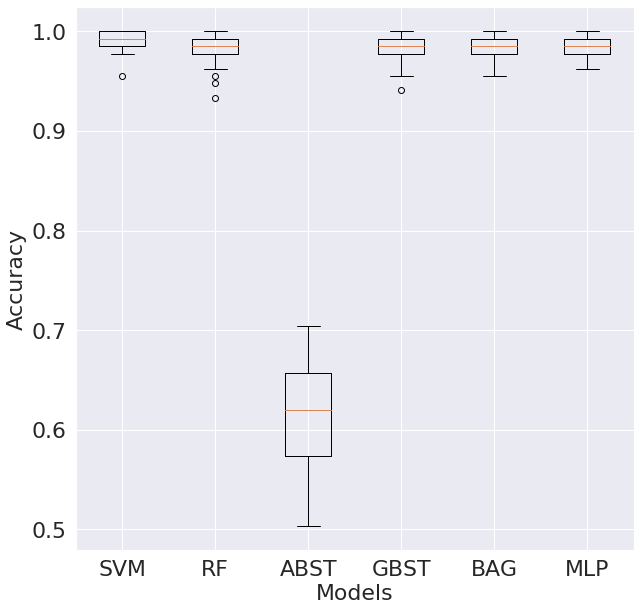

In [86]:
# Accuracy comparison
fig = plt.figure()
# fig.suptitle('Accuracy comparison - Best Case')
ax = fig.add_subplot(111)
ax.set_xticklabels(name)
plt.boxplot(ACC)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.show()

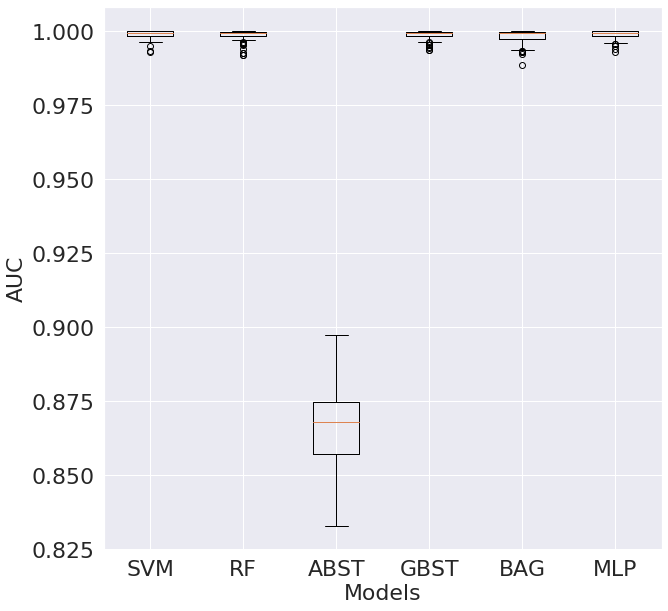

In [87]:
# AUC comparison
fig = plt.figure()
# fig.suptitle('AUC comparison - Best Case')
ax = fig.add_subplot(111)
ax.set_xticklabels(name)
plt.boxplot(AUC)
plt.ylabel('AUC')
plt.xlabel('Models')
plt.show()

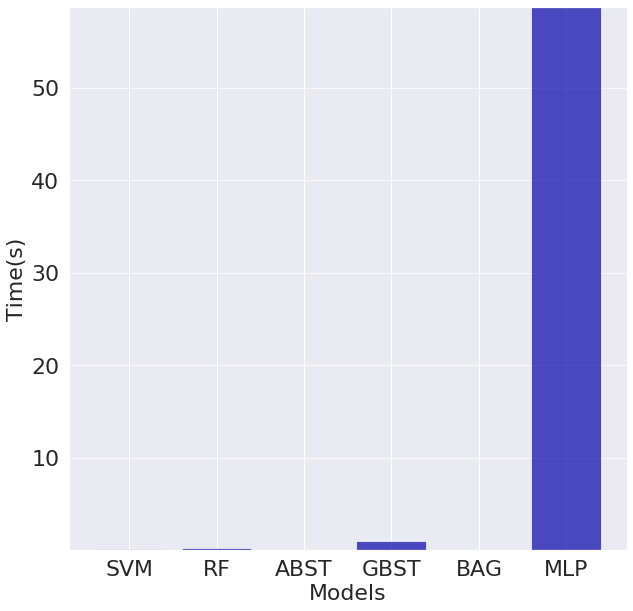

In [88]:
fig = plt.figure()
# fig.suptitle('Mean time trainning each k')
plt.bar(name,TimeForTrain, color='#0504aa',alpha=0.7)
plt.ylim(min(TimeForTrain), max(TimeForTrain))
plt.grid(axis='y', alpha=0.75)
plt.ylabel('Time(s)')
plt.xlabel('Models')
plt.show()

In [89]:
pd.DataFrame(np.array(TimeForTrain),index=name,columns=['Mean Trainning Time'])

,Mean Trainning Time
SVM,0.193155
RF,0.266636
ABST,0.007261
GBST,0.965862
BAG,0.086859
MLP,58.762246


In [90]:
pd.DataFrame(Params,index=name)

,kernel,gamma,degree,C,n_estimators,min_samples_split,min_samples_leaf,max_features,criterion,bootstrap,learning_rate,subsample,max_samples,t_activation,n_neurons,n_hidden_layers,epochs,batch_size
SVM,rbf,0.1,3.0,1.000000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RF,NaN,NaN,NaN,NaN,128.0,6.0,2.0,3.0,gini,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABST,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBST,NaN,NaN,NaN,NaN,256.0,9.0,8.0,2.0,NaN,NaN,0.5,0.8,NaN,NaN,NaN,NaN,NaN,NaN
BAG,NaN,NaN,NaN,NaN,32.0,NaN,NaN,3.0,NaN,False,NaN,NaN,0.8,NaN,NaN,NaN,NaN,NaN
MLP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,relu,100.0,1.0,350.0,6.0


# Generate Spreadsheet with results


In [91]:
if GEN_SHEET==1:
  Best_of_each_case.to_excel(r'ExcelFileResults/CLASSIFICATION.xlsx', index = True, header=True)

In [92]:
Params

[{'kernel': 'rbf', 'gamma': 0.1, 'degree': 3, 'C': 1000000000.0},
 {'n_estimators': 128,
  'min_samples_split': 6,
  'min_samples_leaf': 2,
  'max_features': 3,
  'criterion': 'gini',
  'bootstrap': True},
 {'n_estimators': 4, 'learning_rate': 0.1},
 {'subsample': 0.8,
  'n_estimators': 256,
  'min_samples_split': 9,
  'min_samples_leaf': 8,
  'max_features': 2,
  'learning_rate': 0.5},
 {'n_estimators': 32,
  'max_samples': 0.8,
  'max_features': 3,
  'bootstrap': False},
 {'t_activation': 'relu',
  'n_neurons': 100,
  'n_hidden_layers': 1,
  'epochs': 350,
  'batch_size': 6}]